# Price Behavior Around Dividend Events: Norwegian Energy Stocks

## Abstract

This analysis examines price behavior around 62 dividend events across three Norwegian energy stocks (Equinor, Aker BP, Vår Energi) over a 5-year period (2020-2025). The study identifies distinct price patterns relative to ex-dividend and payment dates, with each stock exhibiting unique behavioral characteristics that suggest optimal entry timing varies by security.

## Methodology

**Dataset**: Historical daily closing prices and dividend events from Yahoo Finance  
**Period**: January 2020 - November 2025  
**Analysis Window**: ±80 trading days around ex-dividend dates  
**Normalization**: Prices indexed to 0% at ex-dividend date for cross-event comparison  
**Sample Size**: Equinor (24 events), Aker BP (24 events), Vår Energi (14 events)

---

## Investment Scenarios

This analysis addresses four common portfolio management situations:

1. **Dividend Reinvestment**: Redeploying cash received from dividend payouts
2. **Portfolio Rebalancing**: Repositioning across multiple holdings
3. **Loss Mitigation**: Reinvesting proceeds from forced liquidations
4. **New Capital Deployment**: Initial position entry timing

Timing analysis suggests entry point selection can impact short-term returns by 3-10% based on position relative to ex-dividend date.

---

## Findings by Security

### Equinor (EQNR.OL)

**Observed Pattern**: Price decline prior to ex-date, suppression through payout period, recovery post-payout

**Quantitative Summary**:
- Trough: Day -53 (-3.86% relative to ex-date price)
- Peak: Day +51 (+6.89% relative to ex-date price)
- Week after ex-date: +0.65% average
- Full cycle range: 10.7%

**Entry Analysis**:
- Favorable window: Days 0 to +21 (ex-date through estimated payout)
- Unfavorable: Days -30 to -1 (pre-ex elevation period)
- Optimal: Days 0 to +10

### Aker BP (AKRBP.OL)

**Observed Pattern**: Pre-ex decline followed by continued post-ex deterioration

**Quantitative Summary**:
- Trough: Day -51 (-10.19% relative to ex-date price)
- Peak: Day +79 (+7.76% relative to ex-date price)
- Week before ex-date: -0.43% average
- Week after ex-date: +1.16% average
- Full cycle range: 17.9%

**Entry Analysis**:
- Favorable window: Days -7 to 0 (week prior to ex-date)
- Unfavorable: Days +1 to +30 (post-ex decline period)
- Optimal: Days -5 to 0

### Vår Energi (VAR.OL)

**Observed Pattern**: Similar to Aker BP but with higher volatility; limited sample size

**Quantitative Summary**:
- Trough: Day -37 (-6.10% relative to ex-date price)
- Week before ex-date: -1.06% average
- Week after ex-date: +0.39% average
- Sample limitation: 14 events since February 2022 IPO

**Entry Analysis**:
- Favorable window: Days -7 to 0
- Unfavorable: Days +1 to +30
- Optimal: Days -5 to 0

---

## Summary Table

| Security | Optimal Entry Window | Rationale | Periods to Avoid |
|----------|---------------------|-----------|------------------|
| Equinor | Days 0 to +21 | Post-ex suppression followed by recovery | Days -30 to -1 |
| Aker BP | Days -7 to 0 | Captures pre-ex dip, avoids post-ex decline | Days +1 to +30 |
| Vår Energi | Days -7 to 0 | Follows Aker BP pattern | Days +1 to +30 |

---

## Data Visualization

The following sections present:
1. Historical price charts with dividend event markers
2. Overlaid dividend cycle analysis (transparency indicates event chronology)
3. Average behavior across all events (±80 day window)
4. Focused analysis (±30 day window)


---

# Data & Analysis

**Stocks**: Equinor (EQNR.OL), Vår Energi (VAR.OL), Aker BP (AKRBP.OL)  
**Period**: 2020-01-01 to present  
**Total Events**: 62 dividend cycles analyzed


## Data Loading


In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


In [2]:
# Define the stocks and date range
stocks = {
    'Equinor': 'EQNR.OL',
    'Vår Energi': 'VAR.OL',
    'Aker BP': 'AKRBP.OL'
}

start_date = '2020-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

print(f"Analysis period: {start_date} to {end_date}")
print(f"Stocks: {', '.join(stocks.keys())}\\n")


Analysis period: 2020-01-01 to 2025-11-16
Stocks: Equinor, Vår Energi, Aker BP\n


### a. Stock Price Data


In [3]:
# Fetch stock price data
stock_data = {}
ticker_objects = {}

for name, ticker in stocks.items():
    print(f"Fetching {name} ({ticker})...")
    ticker_obj = yf.Ticker(ticker)
    ticker_objects[name] = ticker_obj
    
    hist = ticker_obj.history(start=start_date, end=end_date)
    stock_data[name] = hist
    
    print(f"  {len(hist)} trading days from {hist.index[0].strftime('%Y-%m-%d')} to {hist.index[-1].strftime('%Y-%m-%d')}")

print(f"\nData loaded.")


Fetching Equinor (EQNR.OL)...
  1479 trading days from 2020-01-02 to 2025-11-14
Fetching Vår Energi (VAR.OL)...
  943 trading days from 2022-02-16 to 2025-11-14
Fetching Aker BP (AKRBP.OL)...
  1479 trading days from 2020-01-02 to 2025-11-14

Data loaded.


### b. Dividend Dates and Amounts


In [4]:
# Fetch dividend information (ex-dividend dates)
dividend_info = {}

print("Ex-Dividend Dates and Amounts:\n")
print("="*80)

for name, ticker_obj in ticker_objects.items():
    dividends = ticker_obj.dividends
    dividends = dividends[dividends.index >= start_date]
    
    dividend_info[name] = dividends
    
    print(f"\n{name}:")
    if len(dividends) > 0:
        print(f"  Total events: {len(dividends)}")
        print(f"\n  Date       | Amount (NOK)")
        print(f"  {'-'*11}|{'-'*13}")
        for div_date, div_amount in dividends.items():
            print(f"  {div_date.strftime('%Y-%m-%d')} | {div_amount:>10.2f}")
    else:
        print(f"  No dividend data available")

print(f"\n{'='*80}")


Ex-Dividend Dates and Amounts:


Equinor:
  Total events: 24

  Date       | Amount (NOK)
  -----------|-------------
  2020-02-18 |       2.41
  2020-05-15 |       2.72
  2020-08-14 |       0.80
  2020-11-12 |       0.82
  2021-02-11 |       0.93
  2021-05-12 |       0.99
  2021-08-11 |       1.33
  2021-11-11 |       1.81
  2022-02-11 |       1.81
  2022-05-12 |       3.91
  2022-08-11 |       3.86
  2022-11-11 |       7.07
  2023-01-09 |       9.05
  2023-05-11 |       9.05
  2023-08-14 |       9.05
  2023-11-14 |       9.85
  2024-02-14 |       9.47
  2024-05-15 |       7.51
  2024-08-16 |       7.43
  2024-11-18 |       7.75
  2025-02-13 |       7.83
  2025-05-15 |       3.82
  2025-08-18 |       3.77
  2025-11-13 |       3.72

Vår Energi:
  Total events: 14

  Date       | Amount (NOK)
  -----------|-------------
  2022-05-05 |       0.83
  2022-08-04 |       1.02
  2022-11-02 |       1.23
  2023-02-24 |       1.23
  2023-05-03 |       1.15
  2023-08-04 |       1.09
  2023-11-03 

### c. Payment Dates (Estimated)

Note: Yahoo Finance doesn't provide payment dates. Typically, dividends are paid 2-4 weeks after the ex-dividend date.


In [5]:
# Estimate payment dates (typically 2-3 weeks after ex-date for Norwegian stocks)
payment_info = {}

print("Estimated Payment Dates:\n")
print("="*80)

for name, dividends in dividend_info.items():
    payments = {}
    print(f"\n{name}:")
    
    if len(dividends) > 0:
        print(f"  Ex-Date    | Est. Payment (~3 weeks) | Amount (NOK)")
        print(f"  {'-'*11}|{'-'*25}|{'-'*13}")
        
        for div_date, div_amount in dividends.items():
            # Estimate payment date as 21 days after ex-date
            est_payment = div_date + pd.Timedelta(days=21)
            payments[div_date] = est_payment
            print(f"  {div_date.strftime('%Y-%m-%d')} | {est_payment.strftime('%Y-%m-%d')}              | {div_amount:>10.2f}")
    else:
        print(f"  No dividend data available")
    
    payment_info[name] = payments

print(f"\n{'='*80}")
print("Note: Payment dates are estimated. Actual dates may vary by ±1 week.")


Estimated Payment Dates:


Equinor:
  Ex-Date    | Est. Payment (~3 weeks) | Amount (NOK)
  -----------|-------------------------|-------------
  2020-02-18 | 2020-03-10              |       2.41
  2020-05-15 | 2020-06-05              |       2.72
  2020-08-14 | 2020-09-04              |       0.80
  2020-11-12 | 2020-12-03              |       0.82
  2021-02-11 | 2021-03-04              |       0.93
  2021-05-12 | 2021-06-02              |       0.99
  2021-08-11 | 2021-09-01              |       1.33
  2021-11-11 | 2021-12-02              |       1.81
  2022-02-11 | 2022-03-04              |       1.81
  2022-05-12 | 2022-06-02              |       3.91
  2022-08-11 | 2022-09-01              |       3.86
  2022-11-11 | 2022-12-02              |       7.07
  2023-01-09 | 2023-01-30              |       9.05
  2023-05-11 | 2023-06-01              |       9.05
  2023-08-14 | 2023-09-04              |       9.05
  2023-11-14 | 2023-12-05              |       9.85
  2024-02-14 | 2024-03-0

## Visualization

Stock price charts with dividend events marked


In [6]:
# Color scheme for consistency
COLORS = {
    'Equinor': 'red',
    'Aker BP': 'purple', 
    'Vår Energi': 'darkblue'
}

# Helper function to plot stock with dividend events
def plot_stock_with_dividends(stock_name, color=None):
    """Plot stock price with ex-dividend and payment dates marked"""
    data = stock_data[stock_name]
    dividends = dividend_info[stock_name]
    payments = payment_info[stock_name]
    
    # Use consistent color scheme
    if color is None:
        color = COLORS.get(stock_name, 'darkblue')
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot stock price
    ax.plot(data.index, data['Close'], linewidth=1.5, color=color, label='Stock Price')
    
    # Mark ex-dividend dates
    for div_date, div_amount in dividends.items():
        if div_date in data.index:
            price = data.loc[div_date, 'Close']
        else:
            # Find closest trading day
            closest_idx = data.index.get_indexer([div_date], method='nearest')[0]
            price = data.iloc[closest_idx]['Close']
        
        # Ex-date marker
        ax.scatter([div_date], [price], s=150, color='red', zorder=5, marker='v', 
                  edgecolors='black', linewidth=1.5)
        ax.text(div_date, price * 1.05, f'{div_amount:.2f}', ha='center', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
        
        # Payment date marker
        if div_date in payments:
            payment_date = payments[div_date]
            if payment_date <= data.index[-1]:
                if payment_date in data.index:
                    payment_price = data.loc[payment_date, 'Close']
                else:
                    closest_idx = data.index.get_indexer([payment_date], method='nearest')[0]
                    payment_price = data.iloc[closest_idx]['Close']
                
                ax.scatter([payment_date], [payment_price], s=100, color='green', zorder=5, marker='o', 
                          edgecolors='black', linewidth=1)
    
    # Styling
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Price (NOK)', fontsize=12, fontweight='bold')
    ax.set_title(f'{stock_name} - Stock Price with Dividend Events\nRed triangles = Ex-Date | Green circles = Estimated Payment Date', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nChart shows {len(dividends)} dividend events for {stock_name}")


### a. Equinor


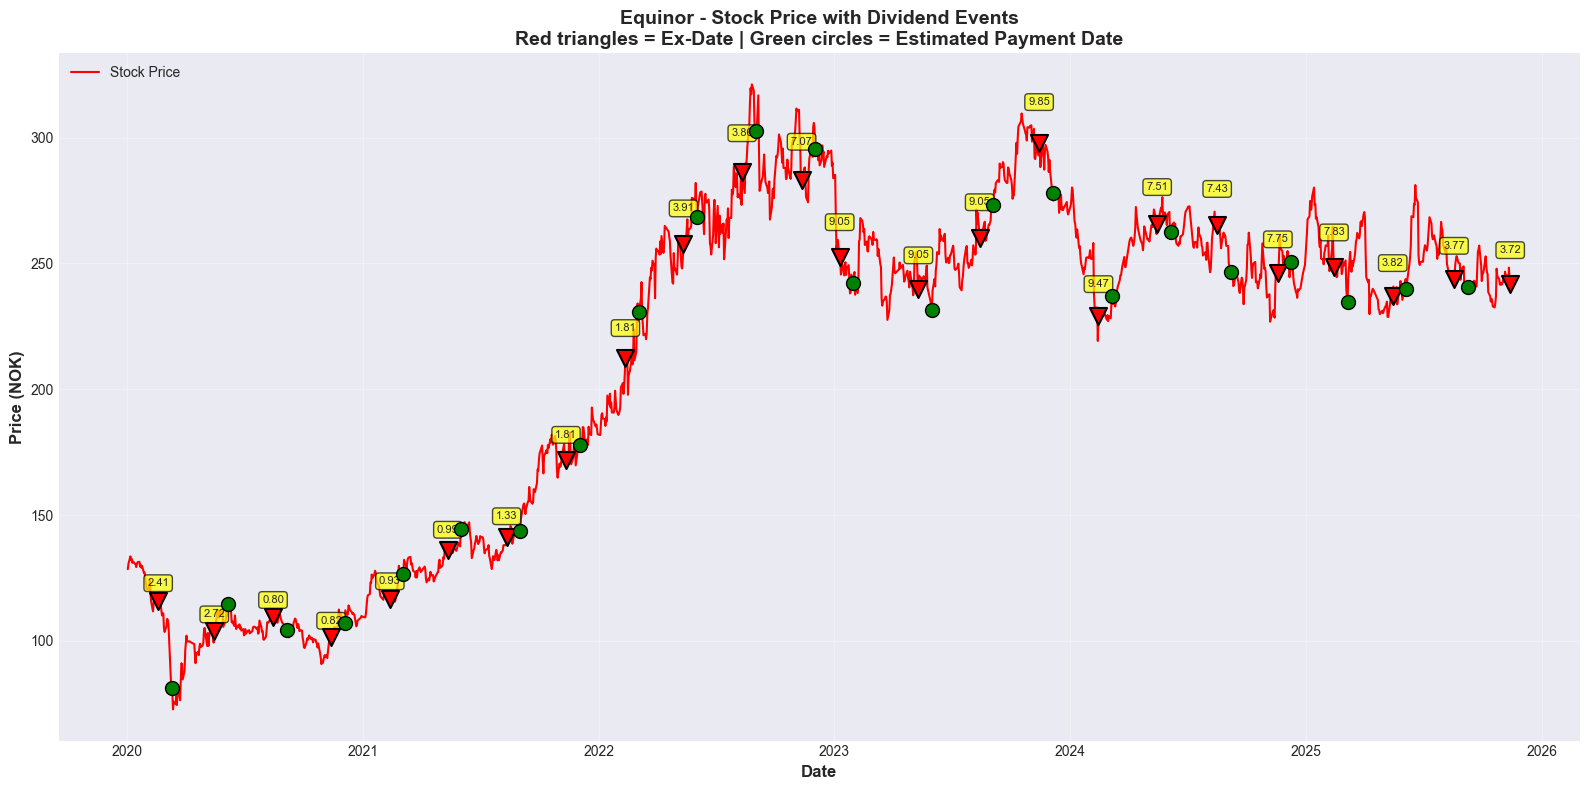


Chart shows 24 dividend events for Equinor


In [7]:
plot_stock_with_dividends('Equinor')


### b. Aker BP


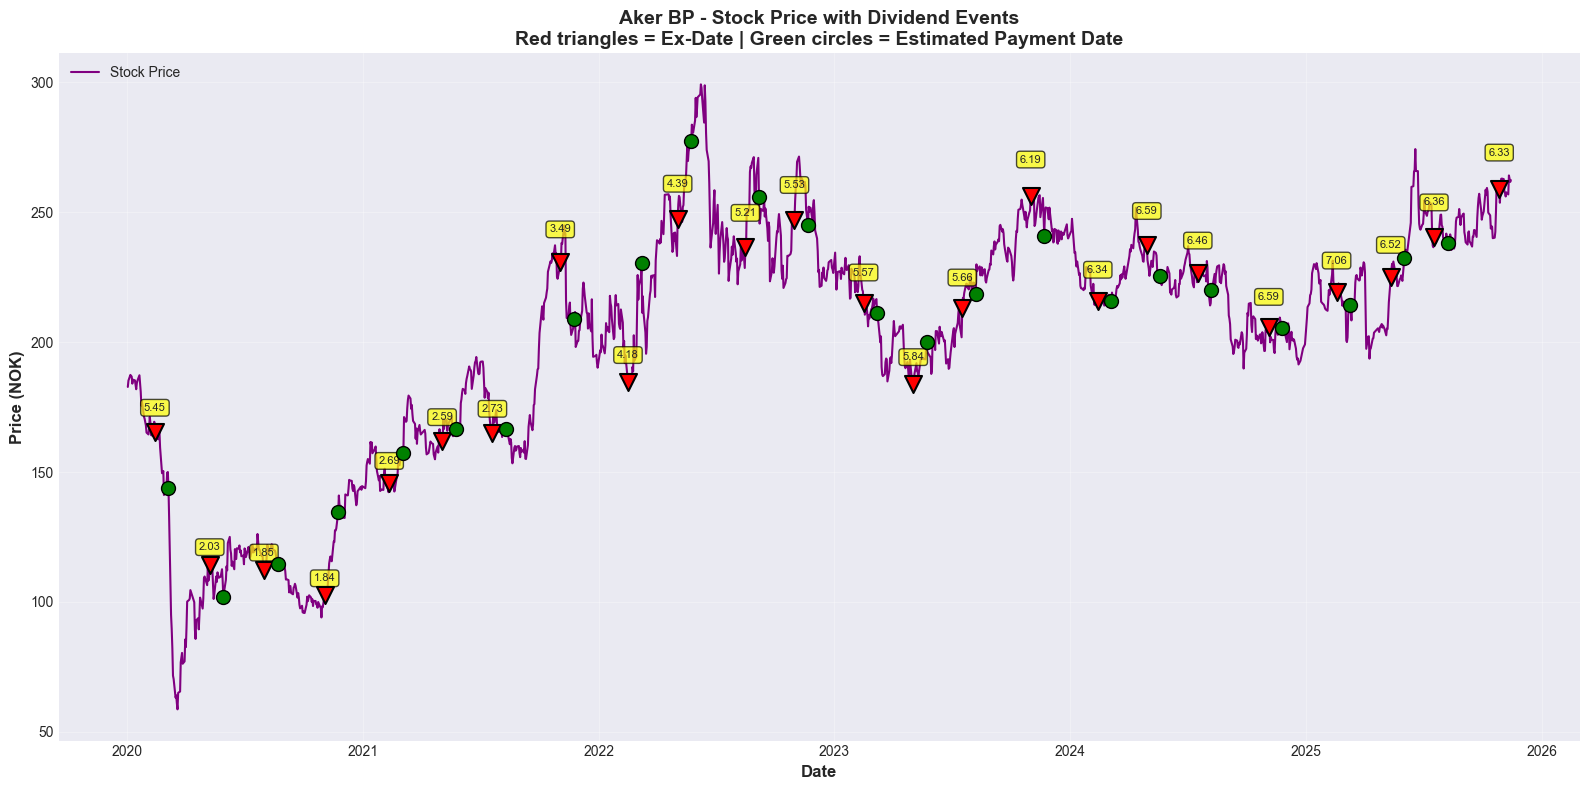


Chart shows 24 dividend events for Aker BP


In [8]:
plot_stock_with_dividends('Aker BP')


### c. Vår Energi


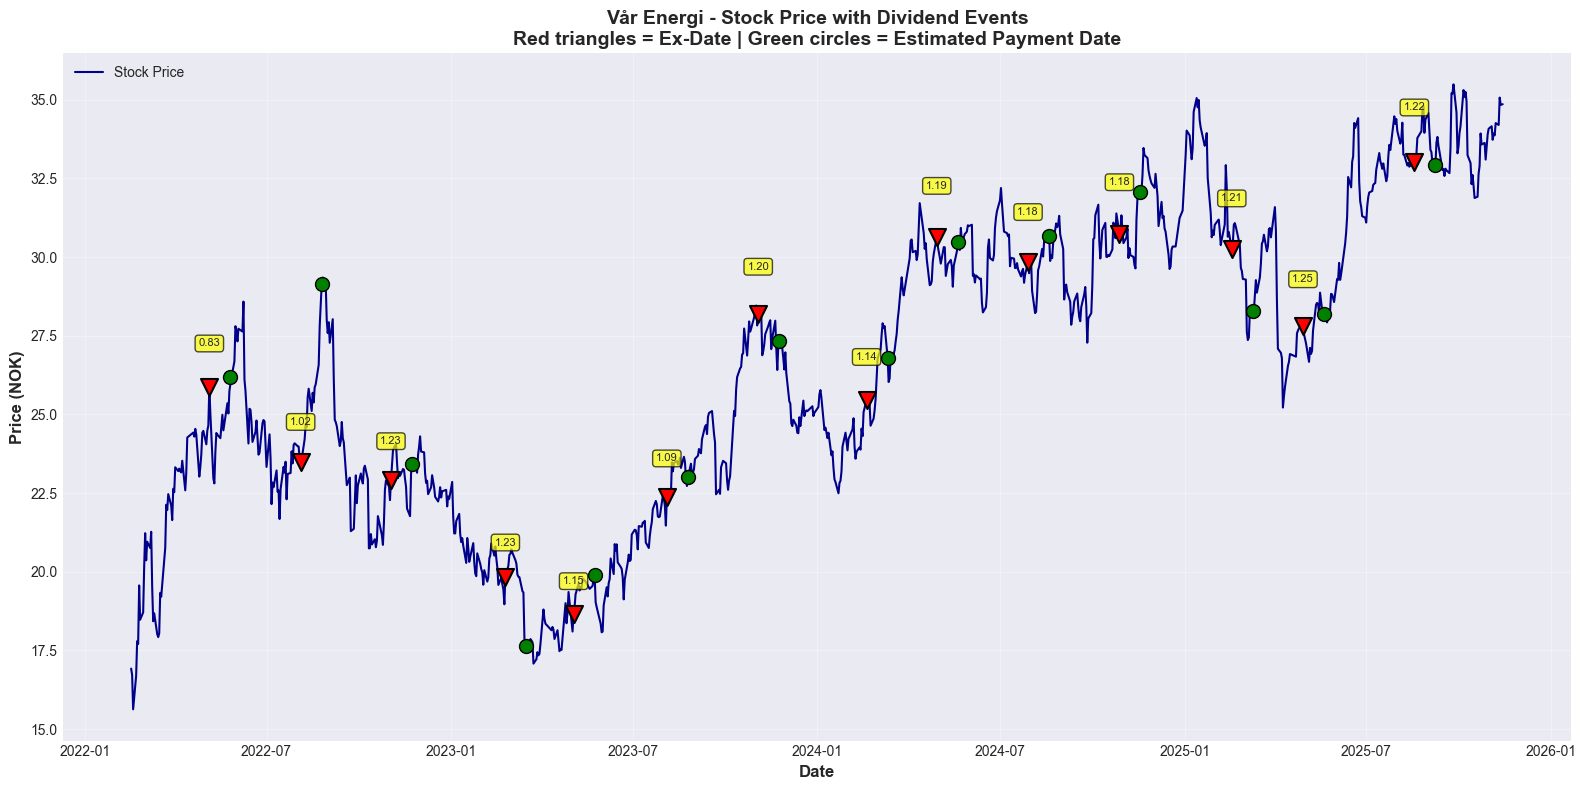


Chart shows 14 dividend events for Vår Energi

Note: Vår Energi IPO'd in February 2022, so historical data is limited


In [9]:
plot_stock_with_dividends('Vår Energi')
print("\nNote: Vår Energi IPO'd in February 2022, so historical data is limited")


## Behavior Insights

Analyzing price behavior around dividend events


In [10]:
# Analyze price behavior ±30 days around ex-dividend dates
# Extract windows around each dividend event

def extract_dividend_windows(stock_name, days_before=30, days_after=30):
    """Extract price data around each dividend event"""
    stock_price = stock_data[stock_name]['Close']
    dividends = dividend_info[stock_name]
    
    windows = []
    
    for div_date, div_amount in dividends.items():
        # Get data window
        start_date = div_date - pd.Timedelta(days=days_before + 10)
        end_date = div_date + pd.Timedelta(days=days_after + 10)
        
        period_data = stock_price[(stock_price.index >= start_date) & (stock_price.index <= end_date)]
        
        if len(period_data) > 0:
            # Find ex-dividend date position
            ex_div_idx = period_data.index.get_indexer([div_date], method='nearest')[0]
            
            # Extract window
            start_idx = max(0, ex_div_idx - days_before)
            end_idx = min(len(period_data), ex_div_idx + days_after + 1)
            window_data = period_data.iloc[start_idx:end_idx]
            
            # Create relative day index (0 = ex-dividend date)
            actual_ex_div_date = period_data.index[ex_div_idx]
            relative_days = [(d - actual_ex_div_date).days for d in window_data.index]
            
            # Normalize to percentage change from ex-dividend price
            ex_div_price = window_data.iloc[ex_div_idx - start_idx]
            normalized_prices = ((window_data - ex_div_price) / ex_div_price) * 100
            
            windows.append({
                'date': div_date,
                'year': div_date.year,
                'amount': div_amount,
                'relative_days': relative_days,
                'normalized_prices': normalized_prices.values
            })
    
    return windows

print("Extracting dividend windows for all stocks (±80 days)...")
all_windows = {}
for stock_name in stocks.keys():
    windows = extract_dividend_windows(stock_name, days_before=80, days_after=80)
    all_windows[stock_name] = windows
    print(f"  {stock_name}: {len(windows)} events")


Extracting dividend windows for all stocks (±80 days)...
  Equinor: 24 events
  Vår Energi: 14 events
  Aker BP: 24 events


### Price Behavior Around Ex-Dividend Dates (±80 days)

Each line represents one dividend event showing the full cycle between dividends. Colors indicate different years.


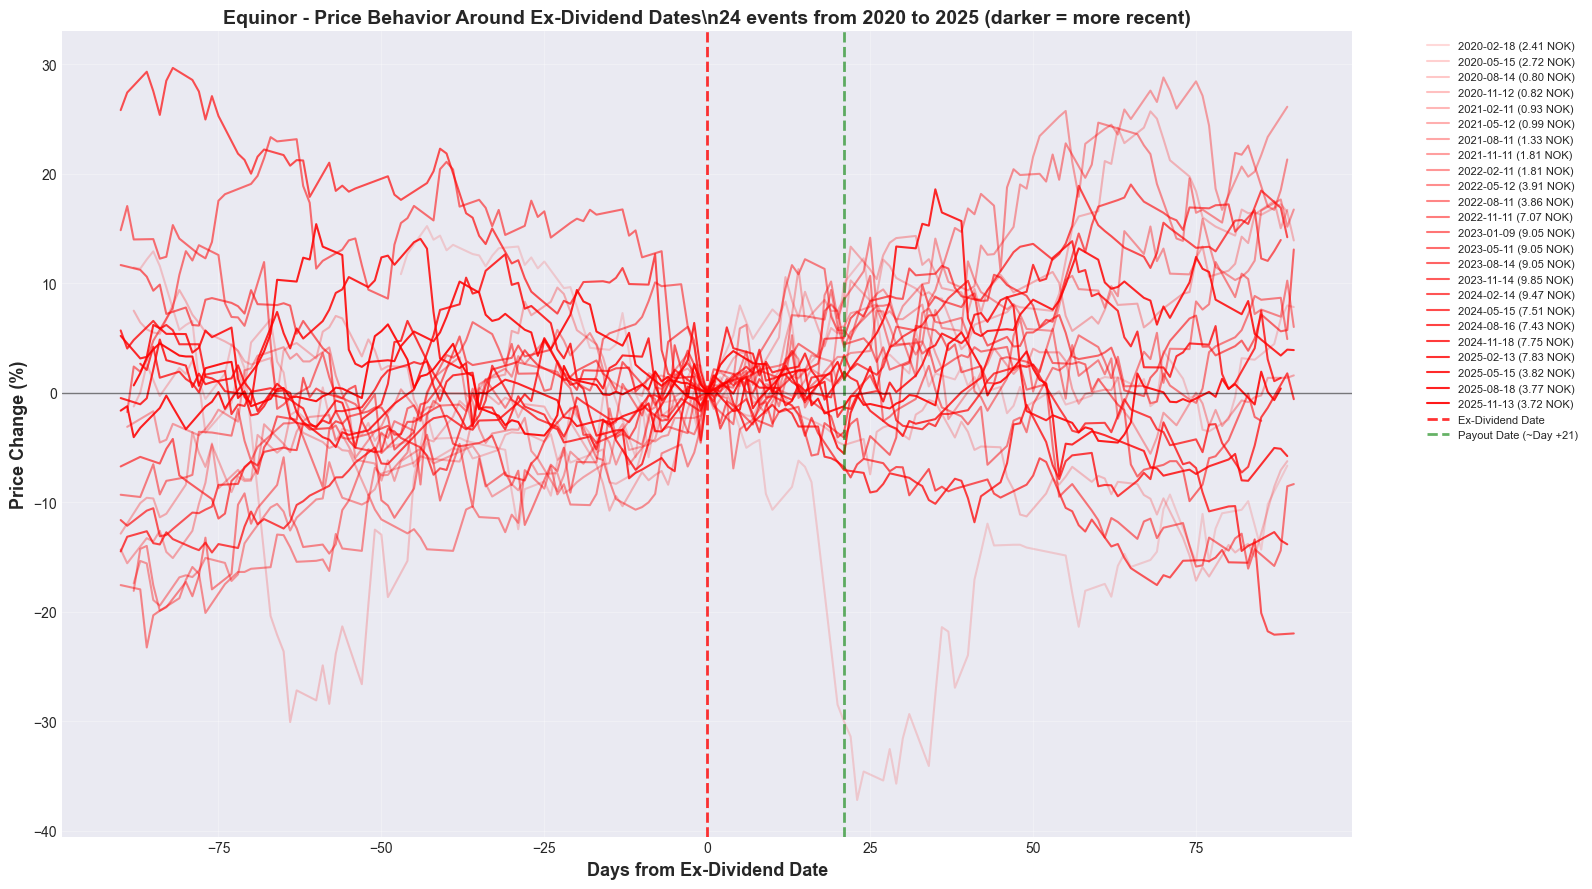


Equinor Summary:
  Total events: 24
  Years covered: 2020-2025
  Events per year: 2020: 4, 2021: 4, 2022: 4, 2023: 4, 2024: 4, 2025: 4



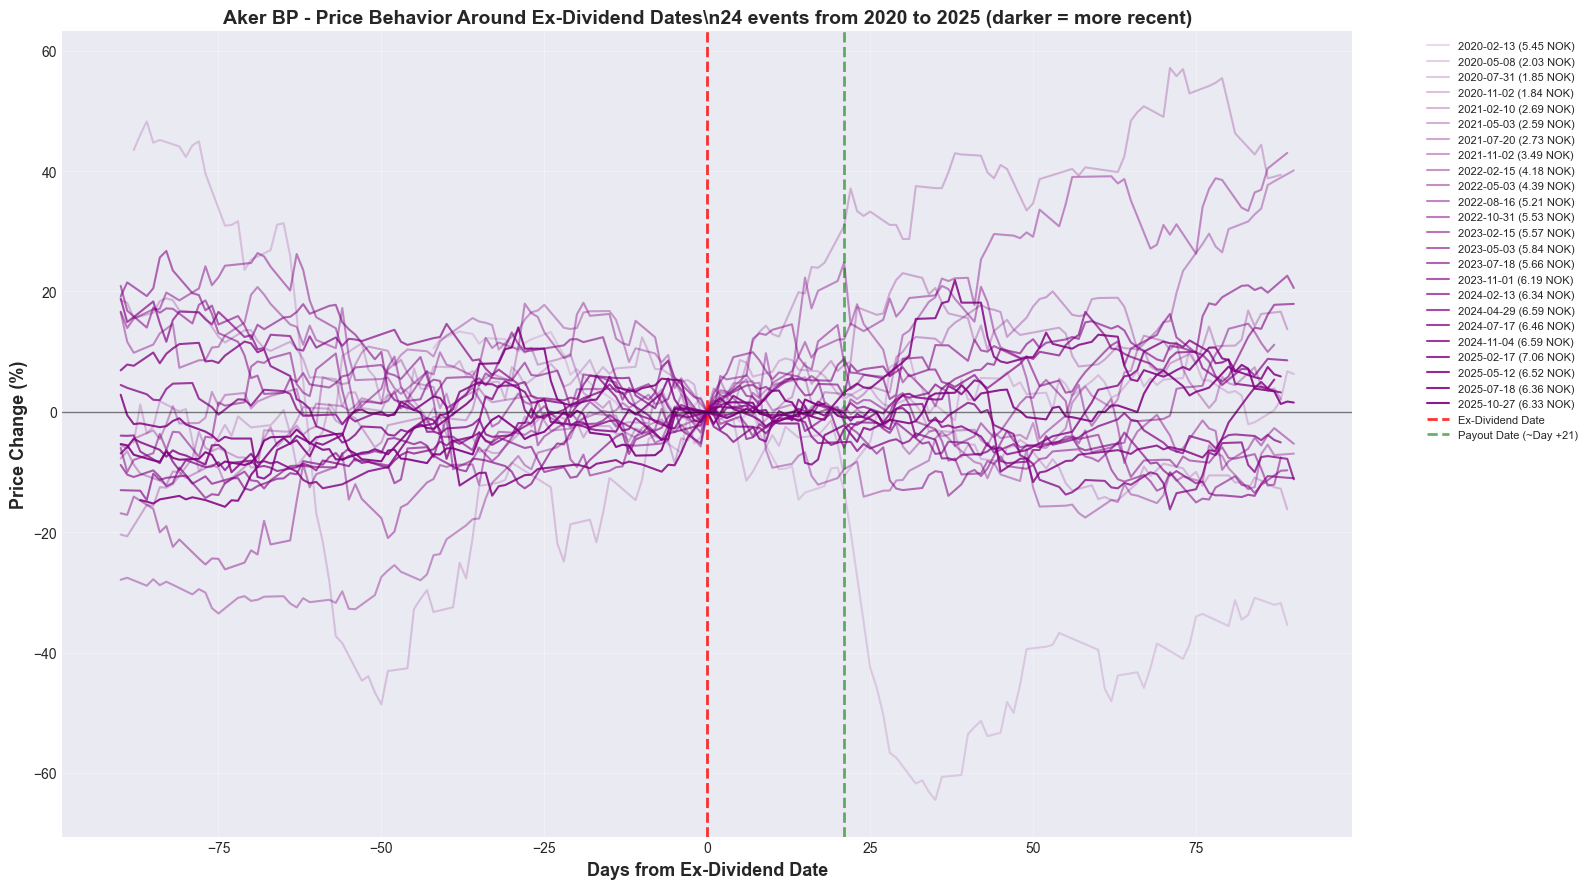


Aker BP Summary:
  Total events: 24
  Years covered: 2020-2025
  Events per year: 2020: 4, 2021: 4, 2022: 4, 2023: 4, 2024: 4, 2025: 4



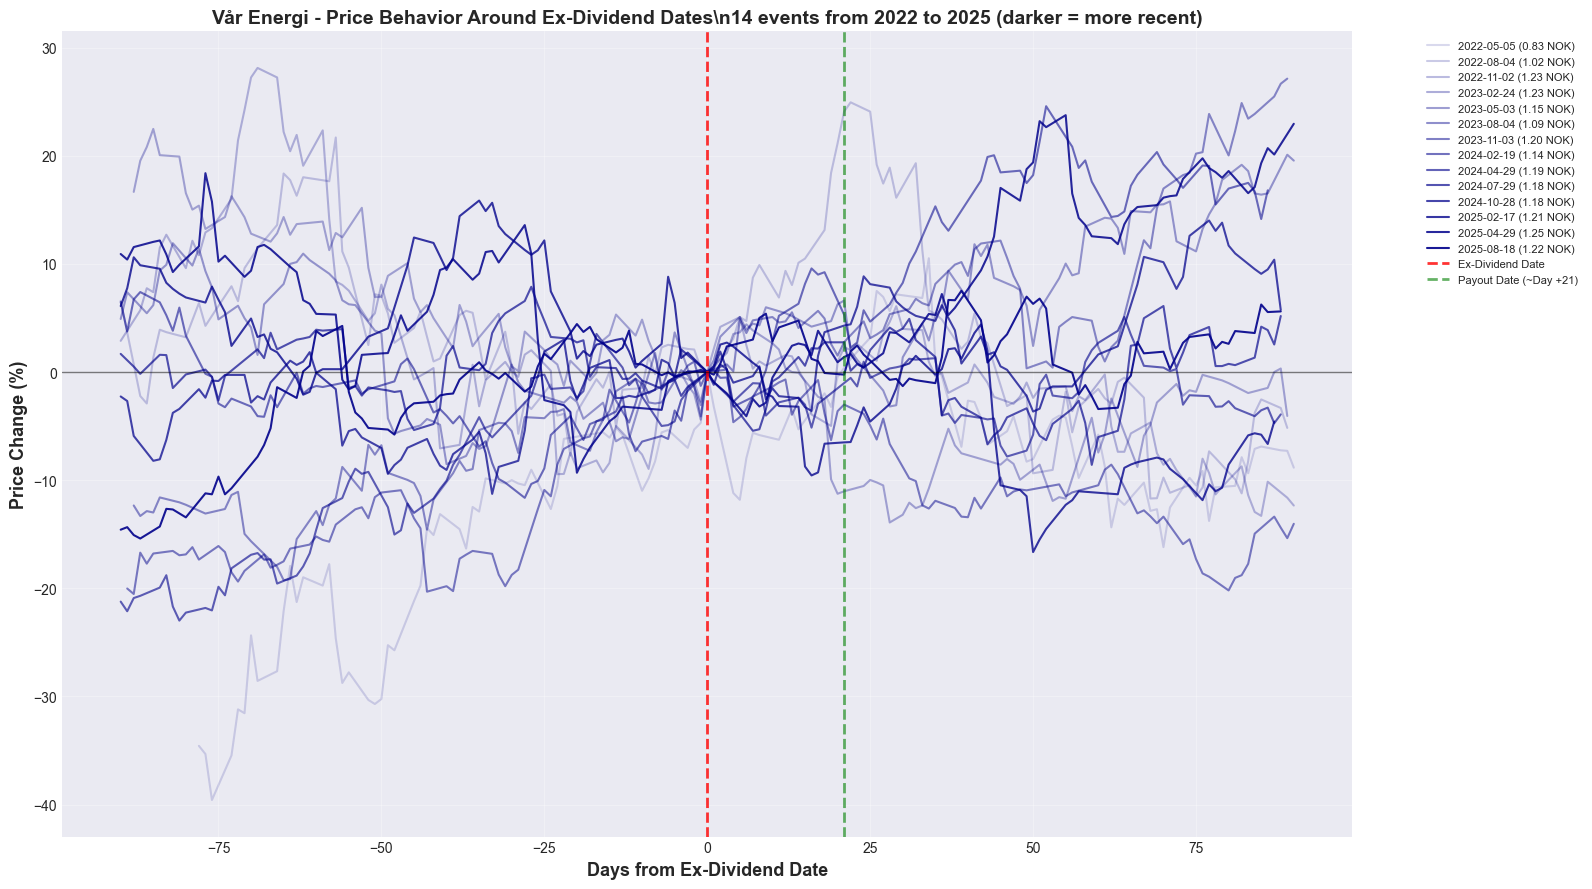


Vår Energi Summary:
  Total events: 14
  Years covered: 2022-2025
  Events per year: 2022: 3, 2023: 4, 2024: 4, 2025: 3


In [11]:
def plot_dividend_behavior(stock_name):
    """Plot all dividend events overlaid with transparency gradient (older = more transparent)"""
    windows = all_windows[stock_name]
    
    if len(windows) == 0:
        print(f"No dividend data for {stock_name}")
        return
    
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Get stock-specific color
    base_color = COLORS.get(stock_name, 'darkblue')
    
    # Sort windows by date (oldest first)
    windows_sorted = sorted(windows, key=lambda x: x['date'])
    
    # Get unique years for summary
    years = sorted(set([w['year'] for w in windows]))
    
    # Create alpha gradient: oldest = most transparent, newest = most opaque
    n_events = len(windows_sorted)
    alphas = np.linspace(0.15, 0.9, n_events)  # Range from 0.15 to 0.9
    
    # Plot each dividend event
    for i, window in enumerate(windows_sorted):
        date_str = window['date'].strftime('%Y-%m-%d')
        year = window['year']
        
        ax.plot(window['relative_days'], 
                window['normalized_prices'],
                color=base_color,
                alpha=alphas[i],
                linewidth=1.5,
                label=f"{date_str} ({window['amount']:.2f} NOK)")
    
    # Add reference lines
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Ex-Dividend Date')
    ax.axvline(x=21, color='green', linestyle='--', linewidth=2, alpha=0.6, label='Payout Date (~Day +21)')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    
    # Styling
    ax.set_xlabel('Days from Ex-Dividend Date', fontsize=13, fontweight='bold')
    ax.set_ylabel('Price Change (%)', fontsize=13, fontweight='bold')
    ax.set_title(f'{stock_name} - Price Behavior Around Ex-Dividend Dates\\n' + 
                 f'{len(windows)} events from {years[0]} to {years[-1]} (darker = more recent)',
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Legend with years color-coded
    handles, labels = ax.get_legend_handles_labels()
    # Remove duplicate "Ex-Dividend Date" label
    unique_labels = []
    unique_handles = []
    seen = set()
    for h, l in zip(handles, labels):
        if l not in seen:
            unique_handles.append(h)
            unique_labels.append(l)
            seen.add(l)
    
    ax.legend(unique_handles, unique_labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
              fontsize=8, ncol=1)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\n{stock_name} Summary:")
    print(f"  Total events: {len(windows)}")
    print(f"  Years covered: {years[0]}-{years[-1]}")
    print(f"  Events per year: {', '.join([f'{y}: {sum(1 for w in windows if w['year'] == y)}' for y in years])}")

# Plot for each stock
for stock_name in ['Equinor', 'Aker BP', 'Vår Energi']:
    print(f"\n{'='*80}")
    plot_dividend_behavior(stock_name)


### Average Behavior Pattern

Shows the average price movement across all dividend events for each stock


Equinor: plotting 161 days (from -80 to 80)
Aker BP: plotting 161 days (from -80 to 80)
Vår Energi: plotting 161 days (from -80 to 80)


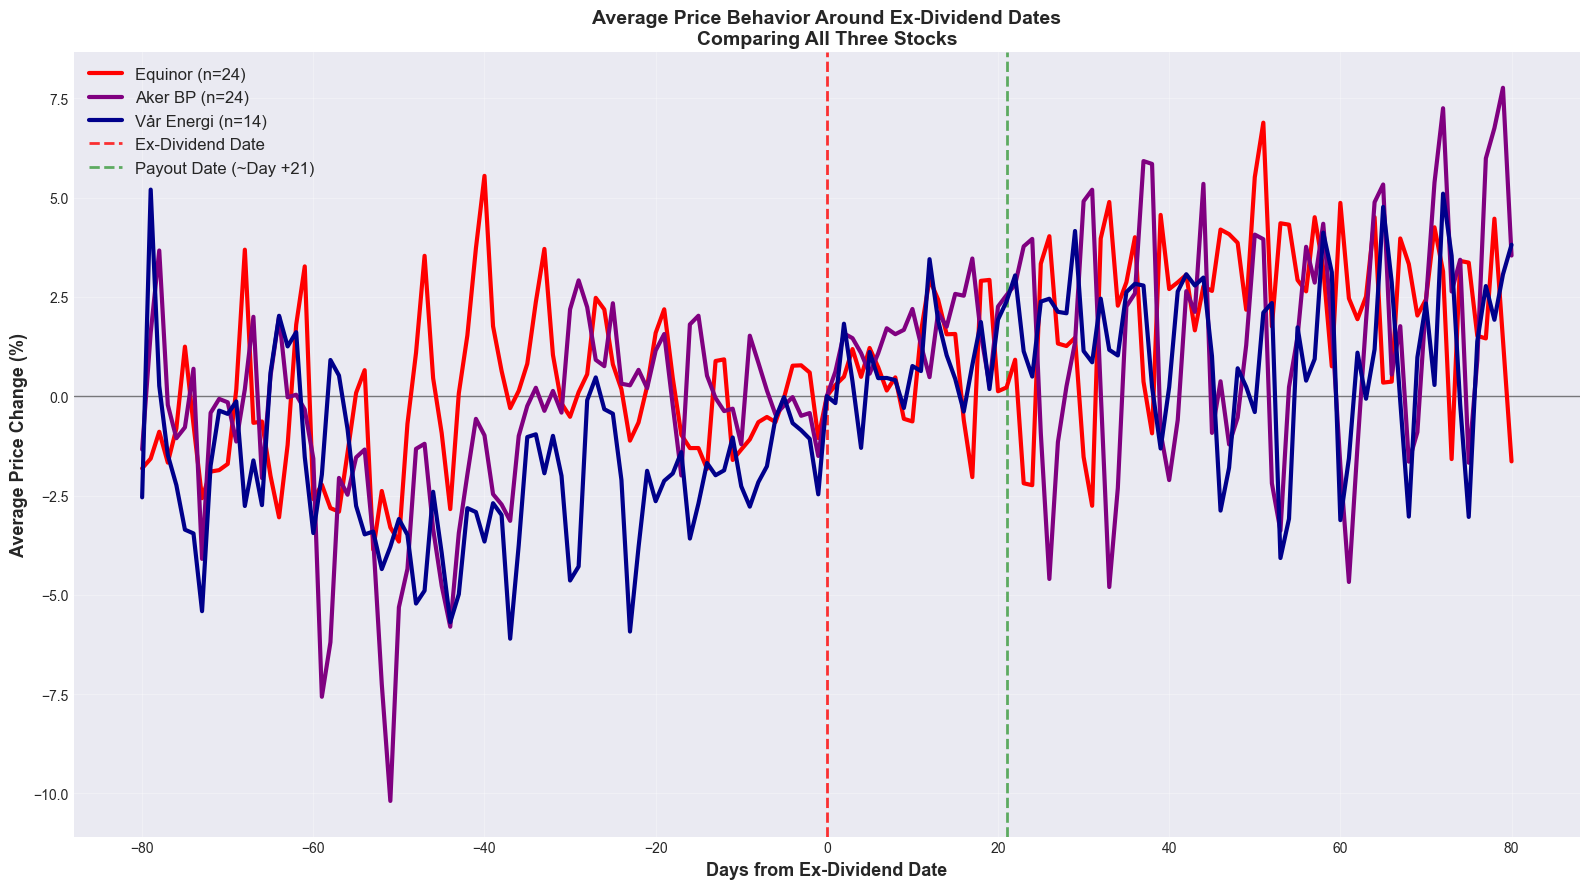


KEY PATTERNS OBSERVED:

Equinor:
  Day 0 (Ex-Date):          +0.00%
  Week before (-7 to -1):   -0.02%
  Week after (+1 to +7):    +0.65%
  Best entry (lowest):      Day -53 (-3.86%)
  Peak price (highest):     Day +51 (+6.89%)

Aker BP:
  Day 0 (Ex-Date):          +0.00%
  Week before (-7 to -1):   -0.43%
  Week after (+1 to +7):    +1.16%
  Best entry (lowest):      Day -51 (-10.19%)
  Peak price (highest):     Day +79 (+7.76%)

Vår Energi:
  Day 0 (Ex-Date):          +0.00%
  Week before (-7 to -1):   -1.06%
  Week after (+1 to +7):    +0.39%
  Best entry (lowest):      Day -37 (-6.10%)
  Peak price (highest):     Day -79 (+5.20%)



In [12]:
# Calculate average behavior across all events
fig, ax = plt.subplots(figsize=(16, 9))

# Use consistent color scheme
colors_map = COLORS

# Use full target range for all stocks
target_days = list(range(-80, 81))

for stock_name in ['Equinor', 'Aker BP', 'Vår Energi']:
    windows = all_windows[stock_name]
    
    if len(windows) == 0:
        continue
    
    # Interpolate all windows to the full target range
    # For each day, collect all available values and average them
    daily_values = {day: [] for day in target_days}
    
    for window in windows:
        # For each day in this window, add its value to the corresponding target day
        for rel_day, price in zip(window['relative_days'], window['normalized_prices']):
            if rel_day in daily_values:
                daily_values[rel_day].append(price)
    
    # Calculate mean for each day (only where we have data)
    valid_days = []
    mean_prices = []
    
    for day in target_days:
        if len(daily_values[day]) > 0:
            valid_days.append(day)
            mean_prices.append(np.mean(daily_values[day]))
    
    # Plot mean line
    ax.plot(valid_days, mean_prices, color=colors_map[stock_name], linewidth=3, 
            label=f'{stock_name} (n={len(windows)})', zorder=10)
    
    print(f"{stock_name}: plotting {len(valid_days)} days (from {min(valid_days)} to {max(valid_days)})")

# Reference lines
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Ex-Dividend Date')
ax.axvline(x=21, color='green', linestyle='--', linewidth=2, alpha=0.6, label='Payout Date (~Day +21)')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Styling
ax.set_xlabel('Days from Ex-Dividend Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Price Change (%)', fontsize=13, fontweight='bold')
ax.set_title('Average Price Behavior Around Ex-Dividend Dates\nComparing All Three Stocks',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# Print key statistics
print(f"\n{'='*80}")
print("KEY PATTERNS OBSERVED:")
print(f"{'='*80}\n")

for stock_name in ['Equinor', 'Aker BP', 'Vår Energi']:
    windows = all_windows[stock_name]
    if len(windows) == 0:
        continue
    
    # Use same approach as plotting: collect values for each day
    daily_values = {day: [] for day in target_days}
    
    for window in windows:
        for rel_day, price in zip(window['relative_days'], window['normalized_prices']):
            if rel_day in daily_values:
                daily_values[rel_day].append(price)
    
    # Calculate mean for each day
    valid_days = []
    mean_prices = []
    
    for day in target_days:
        if len(daily_values[day]) > 0:
            valid_days.append(day)
            mean_prices.append(np.mean(daily_values[day]))
    
    print(f"{stock_name}:")
    
    # Day 0 behavior
    if 0 in valid_days:
        day0_idx = valid_days.index(0)
        print(f"  Day 0 (Ex-Date):          {mean_prices[day0_idx]:+.2f}%")
    
    # Before ex-date
    pre_indices = [i for i, d in enumerate(valid_days) if -7 <= d <= -1]
    if pre_indices:
        pre_avg = np.mean([mean_prices[i] for i in pre_indices])
        print(f"  Week before (-7 to -1):   {pre_avg:+.2f}%")
    
    # After ex-date
    post_indices = [i for i, d in enumerate(valid_days) if 1 <= d <= 7]
    if post_indices:
        post_avg = np.mean([mean_prices[i] for i in post_indices])
        print(f"  Week after (+1 to +7):    {post_avg:+.2f}%")
    
    # Find best/worst days
    best_day_idx = np.argmax(mean_prices)
    worst_day_idx = np.argmin(mean_prices)
    
    print(f"  Best entry (lowest):      Day {valid_days[worst_day_idx]:+d} ({mean_prices[worst_day_idx]:+.2f}%)")
    print(f"  Peak price (highest):     Day {valid_days[best_day_idx]:+d} ({mean_prices[best_day_idx]:+.2f}%)")
    print()
